In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# import data from dataset
df = pd.read_csv('./datasets/liga-mx-clausura-2021.csv')
df.head()

,Datos,Local,Marcador,Visita,Estadio
0,Viernes 8 de Enero de 2021Temporada 2020-2021T...,Puebla F.C.,1 - 1,Guadalajara,Cuauhtémoc
1,Viernes 8 de Enero de 2021Temporada 2020-2021T...,Tijuana,0 - 0,PUMAS,Caliente
2,Viernes 8 de Enero de 2021Temporada 2020-2021T...,Mazatlán FC,3 - 2,Necaxa,Estadio Mazatlán
3,Sábado 9 de Enero de 2021Temporada 2020-2021To...,Atlas,0 - 2,Monterrey,Jalisco
4,Sábado 9 de Enero de 2021Temporada 2020-2021To...,UANL,2 - 0,León,Universitario


In [3]:
# analize datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datos     171 non-null    object
 1   Local     171 non-null    object
 2   Marcador  171 non-null    object
 3   Visita    171 non-null    object
 4   Estadio   171 non-null    object
dtypes: object(5)
memory usage: 6.8+ KB


In [4]:
# fuction to extract the datetime match from string field
def get_jornada(x):
    jor1 = re.findall(r'\d+', x['Datos'])
    jor2 = jor1[0] 
    jor3 = jor1[4]
    lenday = len(jor1[0])
    lenid = len(jor1[4])
    lenjor = lenid - lenday
    jor4 = jor1[4][:lenjor]

    # Liguilla
    ident1 = 'Recalifica'
    ident2 = 'Cuartos'
    ident3 = 'Semifinal'
    ident4 = 'Final'
    if ident1 in x['Datos']:
        jor4 = 18
    if ident2 in x['Datos']:
        jor4 = 19
    if ident3 in x['Datos']:
        jor4 = 20
    if ident4 in x['Datos']:
        jor4 = 21

    return int(jor4)


In [5]:
# Adding datetime match field from string "Datos" field.
df['jornada'] = df.apply(get_jornada, axis=1)
df.head()

,Datos,Local,Marcador,Visita,Estadio,jornada
0,Viernes 8 de Enero de 2021Temporada 2020-2021T...,Puebla F.C.,1 - 1,Guadalajara,Cuauhtémoc,1
1,Viernes 8 de Enero de 2021Temporada 2020-2021T...,Tijuana,0 - 0,PUMAS,Caliente,1
2,Viernes 8 de Enero de 2021Temporada 2020-2021T...,Mazatlán FC,3 - 2,Necaxa,Estadio Mazatlán,1
3,Sábado 9 de Enero de 2021Temporada 2020-2021To...,Atlas,0 - 2,Monterrey,Jalisco,1
4,Sábado 9 de Enero de 2021Temporada 2020-2021To...,UANL,2 - 0,León,Universitario,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datos     171 non-null    object
 1   Local     171 non-null    object
 2   Marcador  171 non-null    object
 3   Visita    171 non-null    object
 4   Estadio   171 non-null    object
 5   jornada   171 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 8.1+ KB


In [7]:
# function to extract local result from "Marcador" field.
def get_marcador_local(x):
    marc = re.findall(r'\d+', x['Marcador'])
    return marc[0]


In [8]:
# function to extract visit result from "Marcador" field.
def get_marcador_visita(x):
    marc = re.findall(r'\d+', x['Marcador'])
    return marc[1]


In [9]:
# adding goals scdored and goals agains from field "Marcador"
df['gf'] = df.apply(get_marcador_local, axis=1).astype(int)
df['gc'] = df.apply(get_marcador_visita, axis=1).astype(int)
df.head()



,Datos,Local,Marcador,Visita,Estadio,jornada,gf,gc
0,Viernes 8 de Enero de 2021Temporada 2020-2021T...,Puebla F.C.,1 - 1,Guadalajara,Cuauhtémoc,1,1,1
1,Viernes 8 de Enero de 2021Temporada 2020-2021T...,Tijuana,0 - 0,PUMAS,Caliente,1,0,0
2,Viernes 8 de Enero de 2021Temporada 2020-2021T...,Mazatlán FC,3 - 2,Necaxa,Estadio Mazatlán,1,3,2
3,Sábado 9 de Enero de 2021Temporada 2020-2021To...,Atlas,0 - 2,Monterrey,Jalisco,1,0,2
4,Sábado 9 de Enero de 2021Temporada 2020-2021To...,UANL,2 - 0,León,Universitario,1,2,0


In [10]:
df.columns

Index(['Datos', 'Local', 'Marcador', 'Visita', 'Estadio', 'jornada', 'gf',
       'gc'],
      dtype='object')

In [11]:
local = df.copy()
local = local[['Local', 'jornada', 'gf', 'gc']].reset_index(drop=True)
local.rename(columns = {'Local':'equipo'}, inplace=True)
local['local'] = 'L'
local.head()

,equipo,jornada,gf,gc,local
0,Puebla F.C.,1,1,1,L
1,Tijuana,1,0,0,L
2,Mazatlán FC,1,3,2,L
3,Atlas,1,0,2,L
4,UANL,1,2,0,L


In [12]:
# reverse visit results to local's
visita = df.copy()
visita = visita[['Visita', 'jornada', 'gf', 'gc']].reset_index(drop=True)
column_order = ['Visita','jornada', 'gc', 'gf']
visita = visita[column_order]
visita.columns = ['Visita', 'jornada', 'gf', 'gc']
visita.rename(columns = {'Visita':'equipo'}, inplace=True)
visita['local'] = 'V'
visita.head()

,equipo,jornada,gf,gc,local
0,Guadalajara,1,1,1,V
1,PUMAS,1,0,0,V
2,Necaxa,1,2,3,V
3,Monterrey,1,2,0,V
4,León,1,0,2,V


In [13]:
# merge local and visit results
tabla = pd.concat([local, visita])
tabla.head()

,equipo,jornada,gf,gc,local
0,Puebla F.C.,1,1,1,L
1,Tijuana,1,0,0,L
2,Mazatlán FC,1,3,2,L
3,Atlas,1,0,2,L
4,UANL,1,2,0,L


In [14]:
def normalize_team_name(x):
    name = x['equipo']
    if 'San Luis' in x['equipo']:
        name = 'San Luis'
    if 'Juárez' in x['equipo']:
        name = 'Juárez'
    if 'Querétaro' in x['equipo']:
        name = 'Querétaro'
    if 'Mazatlán' in x['equipo']:
        name = 'Mazatlán'
    if 'PUMAS' in x['equipo']:
        name = 'Pumas'
    if 'Puebla' in x['equipo']:
        name = 'Puebla'
    if 'Santos' in x['equipo']:
        name = 'Santos'
    if 'UANL' in x['equipo']:
        name = 'Tigres'
    return name

In [15]:
tabla['equipo'] = tabla.apply(normalize_team_name, axis=1)
tabla.head()

,equipo,jornada,gf,gc,local
0,Puebla,1,1,1,L
1,Tijuana,1,0,0,L
2,Mazatlán,1,3,2,L
3,Atlas,1,0,2,L
4,Tigres,1,2,0,L


In [16]:
# adding goals summary fields
tabla['gd'] = tabla['gf'] - tabla['gc']
tabla['pj'] = 1
tabla['pg'] = np.where( tabla['gf'] > tabla['gc'] ,1,0)
tabla['pe'] = np.where( tabla['gf'] == tabla['gc'] ,1,0)
tabla['pp'] = np.where( tabla['gf'] < tabla['gc'] ,1,0)
tabla.head(5)

,equipo,jornada,gf,gc,local,gd,pj,pg,pe,pp
0,Puebla,1,1,1,L,0,1,0,1,0
1,Tijuana,1,0,0,L,0,1,0,1,0
2,Mazatlán,1,3,2,L,1,1,1,0,0
3,Atlas,1,0,2,L,-2,1,0,0,1
4,Tigres,1,2,0,L,2,1,1,0,0


In [17]:
# function to compute points 
def suma_puntos(x):
    puntos = 0
    if x['pg'] == 1:
        puntos += 3
    if x['pe'] == 1:
        puntos += 1
    return puntos


In [18]:
# adding points field
tabla['pts'] = tabla.apply(suma_puntos, axis=1)
tabla.head(5)

,equipo,jornada,gf,gc,local,gd,pj,pg,pe,pp,pts
0,Puebla,1,1,1,L,0,1,0,1,0,1
1,Tijuana,1,0,0,L,0,1,0,1,0,1
2,Mazatlán,1,3,2,L,1,1,1,0,0,3
3,Atlas,1,0,2,L,-2,1,0,0,1,0
4,Tigres,1,2,0,L,2,1,1,0,0,3


In [19]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 170
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   equipo   342 non-null    object
 1   jornada  342 non-null    int64 
 2   gf       342 non-null    int32 
 3   gc       342 non-null    int32 
 4   local    342 non-null    object
 5   gd       342 non-null    int32 
 6   pj       342 non-null    int64 
 7   pg       342 non-null    int32 
 8   pe       342 non-null    int32 
 9   pp       342 non-null    int32 
 10  pts      342 non-null    int64 
dtypes: int32(6), int64(3), object(2)
memory usage: 24.0+ KB


In [24]:
tabla_acum = tabla.copy()
tabla_acum = tabla_acum[tabla_acum['jornada']<=17].sort_values(['equipo','jornada']).reset_index(drop=True)
tabla_acum["pts_a"] = tabla_acum.groupby(['equipo'])['pts'].cumsum(axis=0)
tabla_acum[tabla_acum['equipo']=='Cruz Azul'].sort_values(by=['equipo','jornada'])


,equipo,jornada,gf,gc,local,gd,pj,pg,pe,pp,pts,pts_a
34,Cruz Azul,1,0,1,V,-1,1,0,0,1,0,0
35,Cruz Azul,2,0,1,L,-1,1,0,0,1,0,0
36,Cruz Azul,3,1,0,V,1,1,1,0,0,3,3
37,Cruz Azul,4,4,1,L,3,1,1,0,0,3,6
38,Cruz Azul,5,2,0,V,2,1,1,0,0,3,9
39,Cruz Azul,6,2,0,V,2,1,1,0,0,3,12
40,Cruz Azul,7,3,2,L,1,1,1,0,0,3,15
41,Cruz Azul,8,1,0,V,1,1,1,0,0,3,18
42,Cruz Azul,9,1,0,L,1,1,1,0,0,3,21
43,Cruz Azul,10,1,0,V,1,1,1,0,0,3,24


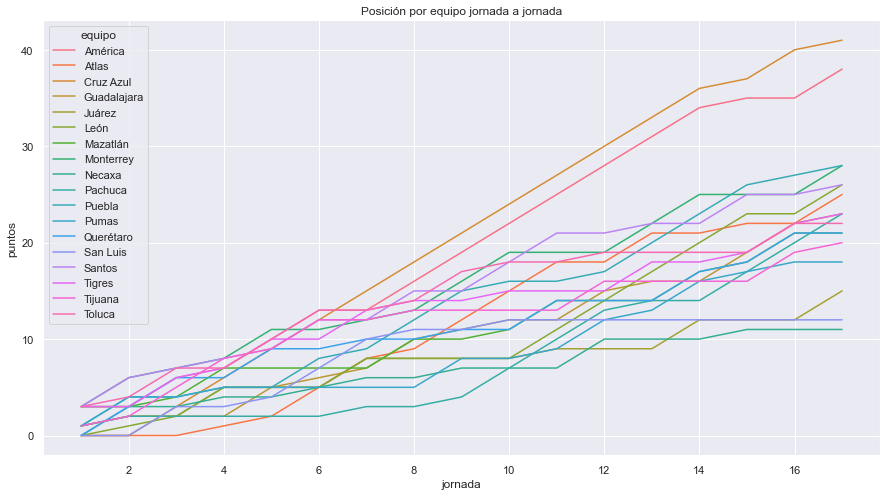

In [25]:
# Posición por jornada
sns.set(rc={'figure.figsize': (15, 8)})
ax = sns.lineplot(x='jornada', y='pts_a', hue='equipo', data=tabla_acum)
ax.set_title('Posición por equipo jornada a jornada')
ax.set(xlabel='jornada', ylabel="puntos");

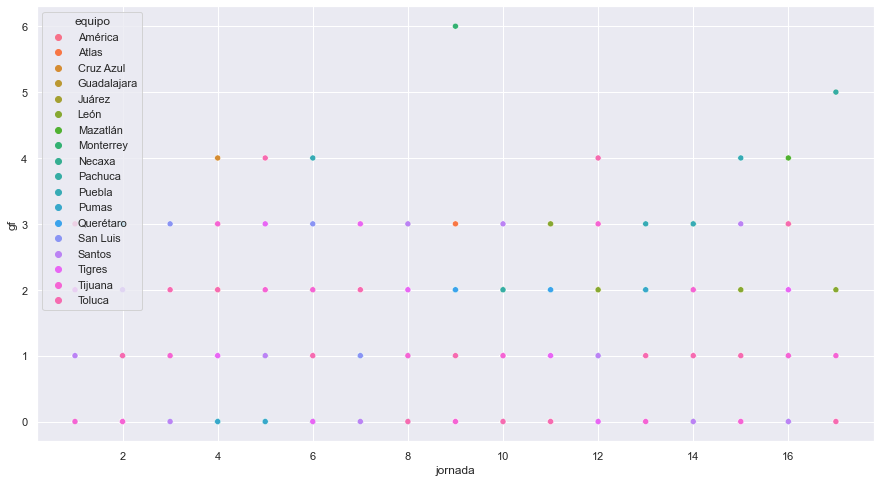

In [41]:
sns.set(rc={'figure.figsize': (15, 8)})
sns.scatterplot(x='jornada', y='gf', hue='equipo', data=tabla_acum);
